# multi_modal_distribution

- 条件付き確率
- 同時確率・加法定理・乗法定理
- 独立・従属・条件付き独立
- 確率分布の性質を利用した計算

In [2]:
# データ読み込み
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(
    '../data/range_sensor/sensor_data_600.txt',
    delimiter=' ',
    header=None,
    names=('date', 'time', 'ir', 'lidar'))
print(data)

           date    time  ir  lidar
0      20180202  110001  28    627
1      20180202  110004  17    626
2      20180202  110007  14    627
3      20180202  110010  31    622
4      20180202  110013  24    630
5      20180202  110016  20    626
6      20180202  110019  18    624
7      20180202  110022  27    629
8      20180202  110025  20    628
9      20180202  110028  32    621
10     20180202  110032  21    624
11     20180202  110035  10    618
12     20180202  110037  13    623
13     20180202  110041   7    621
14     20180202  110044  36    621
15     20180202  110047  38    624
16     20180202  110050  22    627
17     20180202  110053  23    629
18     20180202  110056  24    625
19     20180202  110059  30    627
20     20180202  110101  18    626
21     20180202  110105  23    628
22     20180202  110108  14    622
23     20180202  110110  32    625
24     20180202  110114  24    623
25     20180202  110117  30    625
26     20180202  110119  20    619
27     20180202  110

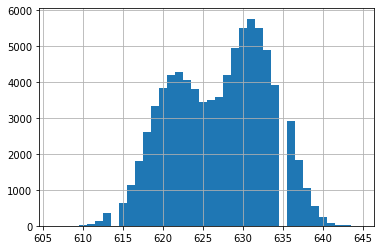

In [3]:
# ヒストグラム
data['lidar'].hist(bins=max(data['lidar'])-min(data['lidar']), align='left')
plt.show()

- 山二ツ
- 正規分布が2つ隣り合ってる感じ

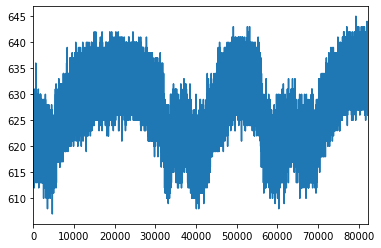

In [4]:
# 時系列でみてみる
data.lidar.plot()
plt.show()

なんか時間経過で上下している  
これは3日間連続で収録したデータなので、なにか関係ありそう

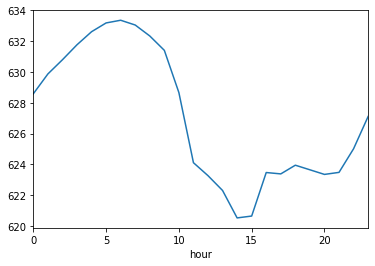

In [5]:
# 時間(hour)を抽出し、hourキーのデータ列としてdataに追加
data['hour'] = [e // 10000 for e in data.time]
d = data.groupby('hour')
d.lidar.mean().plot()
plt.show()

明け方大きい、日中小さい

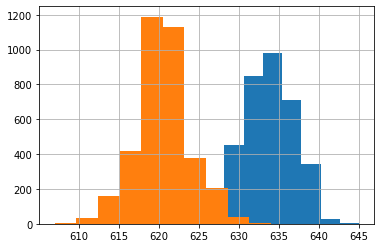

In [6]:
# 6時と14時のグループで頻度分布を表示
d.lidar.get_group(6).hist()
d.lidar.get_group(14).hist()
plt.show()

それぞれの時間帯で正規分布になる
だんだん横へずれていくような感じ

時間帯を制限する（条件付ける）ことでガウス分布になることがわかった
$$
    P(z \mid t \in 6時台) = \it N \rm (z \mid \mu, \sigma^{2})
$$
$t\in6時台$ はtが6時台に含まれるという意

変数$x$で条件付けられる別の変数$y$の確率分布は
$$
    P(y \mid x)
$$
と表現される。

時間帯ごとにガウス分布を作ってみる
$$
    P(z=a, t=b)
$$
センサ値が$a$, 時刻が$b$が同時に起こる事象に対する確率・同時確率

In [7]:
# 時間帯ごとのグループをDictでつくる
# pandasはいろいろデータを変形しやすくて便利だなぁ
each_hour = \
    {
        # 頻度をそのセンサ値毎に出す
        i : d.lidar.get_group(i).value_counts().sort_index()
        for i in range(24)
    }
print(each_hour)

{0: 618      3
619     18
620     32
621     46
622     85
623    132
624    179
625    252
626    308
627    316
628    365
629    361
630    338
631    342
632    250
633    213
634    128
636     71
637     57
638     30
639     11
640      1
641      1
642      1
Name: lidar, dtype: int64, 1: 619      4
620      6
621     13
622     18
623     44
624     80
625    150
626    221
627    267
628    377
629    422
630    467
631    396
632    371
633    254
634    205
636    121
637     71
638     25
639     13
640      5
641      1
642      1
Name: lidar, dtype: int64, 2: 619      1
620      3
621      3
622      7
623     19
624     45
625     75
626    124
627    171
628    312
629    426
630    471
631    470
632    424
633    369
634    279
636    172
637     91
638     42
639     14
640      8
641      2
642      1
Name: lidar, dtype: int64, 3: 620      1
622      2
623      3
624     16
625     38
626     90
627    139
628    219
629    352
630    406
631    467
632    449
633 

In [8]:
# 時間帯・センサ値のテーブルを作る
# 確率に変換もする
freqs = pd.concat(each_hour, axis=1)
freqs = freqs.fillna(0)
probs = freqs / len(data)
print(type(probs))
print(probs)

<class 'pandas.core.frame.DataFrame'>
           0         1         2         3         4         5         6   \
607  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
608  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
609  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
610  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
611  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
612  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
613  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
615  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
616  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
617  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
618  0.000036  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
619  0.000219  0.000049  0.000012  0.0

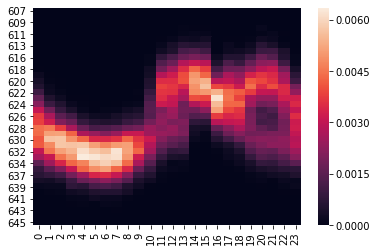

In [9]:
# 確率分布を可視化
import seaborn as sns

sns.heatmap(probs)
plt.show()

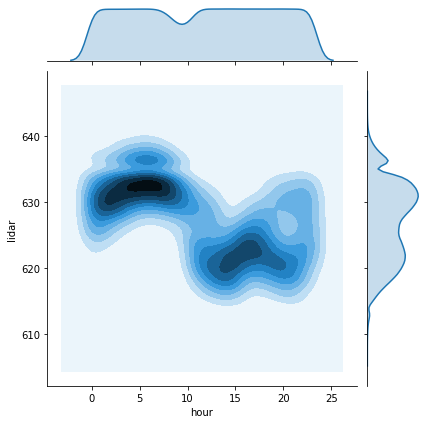

In [10]:
sns.jointplot(data['hour'], data['lidar'], data, kind='kde')
plt.show()

センサ値と時間帯の関係を示す同時確率分布（結合確率分布）

右側のグラフ（時間帯毎に合計したときの分布）
$$
    P(z) = \sum_{t}P(z, t)
$$
上側のグラフ（センサ値毎に合計した時の分布)
$$
    P(t) = \sum_{z}P(z, t)
$$
同時確率をそれぞれの変数について合計する

         0         1         2         3         4         5         6   \
0  0.043013  0.042916  0.042879  0.042916  0.042964  0.043037  0.043061   

         7         8         9   ...        14        15        16        17  \
0  0.043001  0.038712  0.028651  ...  0.043183  0.043122  0.043061  0.043122   

         18        19        20        21        22        23  
0  0.043049  0.043086  0.043159  0.042976  0.043049  0.043037  

[1 rows x 24 columns]
0    1.0
dtype: float64


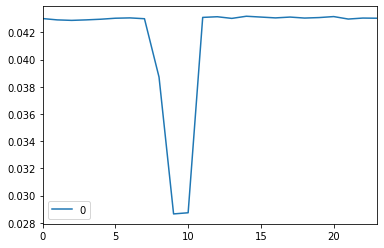

In [11]:
# 列毎（時間帯毎）の合計値のリスト
p_t = pd.DataFrame(probs.sum())
p_t.plot()
print(p_t.transpose())
print(p_t.sum())

        607       608       609       610      611      612       613  \
0  0.000012  0.000049  0.000061  0.000328  0.00068  0.00158  0.004241   

        615       616       617  ...      636      637       638       639  \
0  0.007752  0.013852  0.022053  ...  0.03537  0.02226  0.012819  0.006671   

        640       641       642       643       644       645  
0  0.002989  0.000996  0.000401  0.000109  0.000024  0.000012  

[1 rows x 37 columns]
0    1.0
dtype: float64


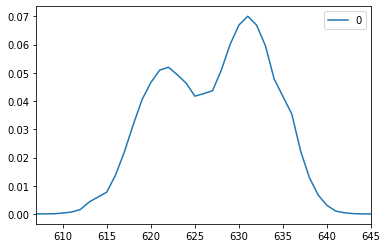

In [12]:
# 行毎（センサ値毎）の合計値のリスト
p_z = pd.DataFrame(probs.transpose().sum())
p_z.plot()
print(p_z.transpose())
print(p_z.sum())

2変数の確率分布に対して、
$$
    P(x) = \sum_{y \in Y} P(x, y)
$$
がなりたつ

これが確率の加法定理

$P(x, y)$から次元を落として$P(x)$を作ることを周辺化、その$P(x)$を周辺確率という

条件付き確率との関係

$t = 0$ と固定した時、$P(z \mid t = 0)$ の分布は、$P(z, t)$ の分布の$t = 0$ である部分と形状は同じ  
値は正規化されている

$$
    P(z \mid t) = \frac{P(z, t)}{P(t)}
$$
$$
    P(z, t) = P(z \mid t) P(t)
$$

In [13]:
# P(x, t)からP(z | t)をつくってみる
joint_z_t = probs
cond_z_t = joint_z_t / p_t[0]
cond_z_t

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000282,0.000283,0.000000,0.000000
609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000283,0.000282,0.000000
610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000844,0.001127,0.000000,0.000000,0.000282,0.000282,0.003097,0.000000,0.000000,0.000000
611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003376,0.002818,0.000000,0.000000,0.000000,0.000564,0.001689,0.003393,0.001129,0.000000
612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005065,0.007326,0.000000,0.000845,0.000847,0.001410,0.005912,0.004524,0.000564,0.000282
613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014350,0.014934,0.000564,0.004227,0.001411,0.005076,0.015766,0.010178,0.002540,0.000565
615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.030107,0.024232,0.000564,0.004790,0.006209,0.008742,0.022804,0.023749,0.011008,0.001129
616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.045301,0.041984,0.005079,0.013807,0.013830,0.023689,0.039977,0.032513,0.013830,0.001976
617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.072032,0.067906,0.011851,0.029304,0.021451,0.038071,0.051239,0.053435,0.023709,0.003388


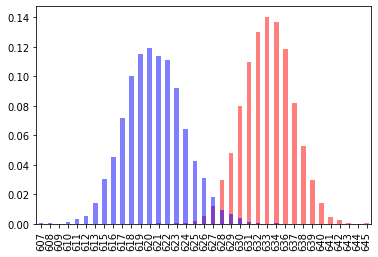

In [14]:
(cond_z_t[6]).plot.bar(color='red', alpha=0.5)
(cond_z_t[14]).plot.bar(color='blue', alpha=0.5)
plt.show()

ベイズの定理

$$
    P(z \mid t) = \frac{P(t \mid z) P(z)}{P(t)}
$$

In [15]:
# ベイズの定理の確認
# 行と列を入れ替えて同様に計算するとP(t | z)となる
cond_t_z = joint_z_t.transpose() / joint_z_t.transpose().sum()
print(cond_t_z)

# 何時かわからんけどセンサ値が630になる確率P(z = 630)
print('P(z = 630) = {}'.format(p_z[0][630]))
# センサ値はさておき時刻が13時になる確率P(t = 13)
print('P(t = 13) = {}'.format(p_t[0][13]))
print('P(t = 13 | z = 630) = {}'.format(cond_t_z[630][13]))

print('bayes P(z = 630 | t = 13) = {}'.format(cond_t_z[630][13] * p_z[0][630] / p_t[0][13]))

# 13時にセンサの値が630
print('answer P(z = 630 | t = 13) = {}'.format(cond_z_t[13][630]))

    607   608  609       610       611       612       613       615  \
0   0.0  0.00  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.0  0.00  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.0  0.00  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.0  0.00  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.0  0.00  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.0  0.00  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.0  0.00  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
7   0.0  0.00  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
8   0.0  0.00  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
9   0.0  0.00  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.0  0.00  0.0  0.000000  0.000000  0.000000  0.002865  0.003135   
11  0.0  0.00  0.0  0.000000  0.017857  0.030769  0.031519  0.036050   
12  0.0  0.00  0.0  0.074074  0.017857  0.076923  0.094556  0.06

確率ロボティクスではセンサ値（データ）からロボットの姿勢（原因）を推定する  

今回はためしに、センサ値から計測した時間帯を推定してみる

In [16]:
def bayes_estimation(sensor_value, current_estimation):
    u"""
    
    Args:
        sensor_data(int): センサ値
        current_estimation(pandas.DataFrame): P(t)
        cond_z_t(pandas.DataFrame): P(z | t)
    """
    new_estimation = []
    for i in range(24):
        # P(z | t) * P(t)
        new_estimation.append(
            cond_z_t[i][sensor_value] * current_estimation[i])
        
    # 正規化されたP(t | z)
    return new_estimation / sum(new_estimation)

[]

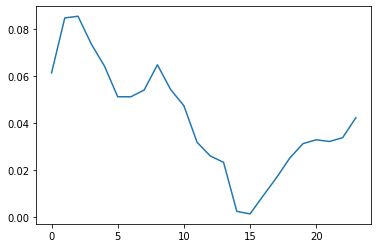

In [17]:
estimation = bayes_estimation(630, p_t[0])
plt.plot(estimation)
plt.plot()

センサ値z=630は夜中に取れたと思われる

つづけて$z_{1}$, $z_{2}$, $z_{3}$が得られた時はこう考えることができる

$$
    P(t \mid z_{1}, z_{2}, z_{3}) = \nu P(z_{1}, z_{2}, z_{3} \mid t) P(t)
$$

$z_{1}$, $z_{2}$, $z_{3}$をひとまとめの事象として考えている

$t$を条件付けた時にそれらが独立であるならば、

$$
    P(t \mid z_{1}, z_{2}, z_{3}) = \nu P(z_{1}, z_{2}, z_{3} \mid t) P(t)
$$
$$
  = P(z_{1} \mid t)P(z_{2}, z_{3} \mid t)P(t)\\
$$
$$
  = P(z_{1} \mid t)P(z_{2} \mid t)P(z_{3} \mid t)P(t)\\
$$
    

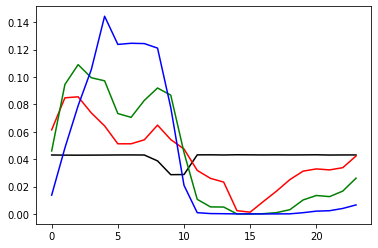

In [18]:
# センサ値(5時台の値を選んでみた)
z_1 = 630
z_2 = 632
z_3 = 636
zs = [z_1, z_2, z_3]

# 時間帯毎の頻度（初期値）
estimation = p_t[0]
plt.plot(estimation, color='black')

colors = ['red', 'green', 'blue']
for z, color in zip(zs, colors):
    estimation = bayes_estimation(z, estimation)
    plt.plot(estimation, color=color)
plt.show()

5時台が高いのでだいたい推定できてる